# Projet d'Analyse de Sentiment
---

## Equipe
---

OUEDRAOGO Coralie <br>
MARTINET Alexis <br>
SAINT MARTIN Julie <br>
BAZANA NTOMO Fideline <br>


In [57]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('text_sentiment.csv')

In [24]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


## Suppression des colonnes 'tweet_id' et 'author'

---


- La colonne comporte 40000 valeurs distinctes puisqu'elle sert donc à identifier les différentes lignes (tweets) <br>
- Elle n'est donc pas nécessaire pour notre analyse <br> <br>

- La colonne 'author' n'est également pas utile également pour notre étude, nous pouvons la supprimer

In [25]:
print(df.shape)
print(df.nunique())

(40000, 4)
tweet_id     40000
sentiment       13
author       33871
content      39827
dtype: int64


In [26]:
df = df.drop(labels=['tweet_id', 'author'], axis=1)
print(df.shape)

(40000, 2)


In [27]:
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


## Traitement des valeurs nulles

---
- On remarque qu'il n'y a aucune valeur nulle dans nos données

In [28]:
df.isna().sum()

sentiment    0
content      0
dtype: int64

## Suppression des doublons

---

- Nous avons remarqué que 91 lignes étaient dupliquées dans notre dataframe <br>
- Nous allons donc supprimer toutes les lignes dupliquées et ne conserver que les premières occurrences


In [48]:
df.duplicated().sum()

91

In [49]:
# Affichage des lignes lignes dupliquées
df[df.duplicated()].sort_values(by=df.columns.to_list())

,sentiment,content
30644,happiness,@JonathanRKnight BTW I STILL can't believe how...
37781,happiness,@andyclemmensen have you seen the game on the ...
33376,happiness,FREE UNLIMITED RINGTONES!!! - http://tinyurl.c...
33409,happiness,FREE UNLIMITED RINGTONES!!! - http://tinyurl.c...
33414,happiness,FREE UNLIMITED RINGTONES!!! - http://tinyurl.c...
...,...,...
18472,worry,My back hurts
8878,worry,My throat hurts
521,worry,Somebody please save the polar bears!
18130,worry,i have a headache


In [50]:
# Affichage de toutes les lignes dupliquées
df[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

,sentiment,content
29045,happiness,@JonathanRKnight BTW I STILL can't believe how...
30644,happiness,@JonathanRKnight BTW I STILL can't believe how...
37773,happiness,@andyclemmensen have you seen the game on the ...
37781,happiness,@andyclemmensen have you seen the game on the ...
33353,happiness,FREE UNLIMITED RINGTONES!!! - http://tinyurl.c...
...,...,...
454,worry,Somebody please save the polar bears!
521,worry,Somebody please save the polar bears!
14208,worry,i have a headache
18130,worry,i have a headache


In [51]:
df = df.drop_duplicates(keep='first', ignore_index=True)
print(df.shape)

(39909, 2)


## Conserver les lignes dont 'content' a plus de 1000 caractères

---

In [232]:
#df[df['content'].str.len() >= 100]
df['content'].str.len().max()

133

## Nettoyage des données textuelles

---

- Suppression des mentions @, # <br>
- Suppression des signes de ponctuations <br>
- Suppression des stopwords <br>
- Conversion en minuscule <br>

In [65]:
import re, string
from nltk.corpus import stopwords

mention_regex = re.compile(r'@\w+')
hashtag_regex = re.compile(r'#\w+')
non_word_regex = re.compile(r'\W+')
space_regex = re.compile(r'\s+')

stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

In [66]:
def clean_text(text):
    # Supprimer les mentions
    text = mention_regex.sub('', text)
    
    # Supprimer les hashtags
    text = hashtag_regex.sub('', text)
    
    # Supprimer tout ce qui n'est pas un mot
    text = non_word_regex.sub(' ', text)
    
    # Convertir en minuscules
    text = text.lower()
    
    # Supprimer les espaces de début et de fin
    text = text.strip()
    
    # Supprimer tous les doublons d'espace
    text = space_regex.sub(' ', text)
    
    # Supprimer les stopwords
    non_stop_words = [word for word in text.split() if word not in stop_words]
    text = ' '.join(non_stop_words)
    
    # Supprimer les signes de ponctuations
    non_punctuation = [char for char in text if char not in punctuations]
    text = ''.join(non_punctuation)
    
    return text

In [67]:
df['content'] = df['content'].apply(clean_text)

## Traitement des différentes langues

---

- On ne garde que les lignes où la langue est l'anglais (en)

In [68]:
from langdetect import detect

def detect_lang(text):
    try:
        return detect(text)
    except:
        return None

In [69]:
df = df[df['content'].apply(detect_lang) == 'en']

In [106]:
# Ré-initialisation des index
df = df.reset_index(drop=True)

## Colonne 'sentiment'

---

- Le but de notre travail est de prédire les sentiments des tweets, la colonne 'sentiment' sera donc la variable cible

<Axes: >

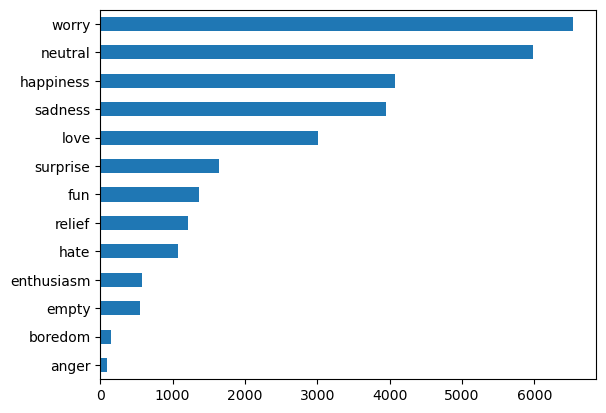

In [98]:
df['sentiment'].value_counts(ascending=True).plot(kind='barh')

In [109]:
df

,sentiment,content
0,empty,know listenin bad habit earlier started freaki...
1,sadness,layin n bed headache ughhhh waitin call
2,sadness,funeral ceremony gloomy friday
3,neutral,want trade someone houston tickets one
4,sadness,sleep im thinking old friend want married damn...
...,...,...
30209,happiness,succesfully following tayla
30210,love,happy mothers day love
30211,love,happy mother day mommies woman man long momma ...
30212,happiness,wassup beautiful follow peep new hit singles w...


## Stemming vs Lemmatization

In [229]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [157]:
def preprocess_text(text, method='stemming'):
    tokens = word_tokenize(text)
    
    if method == 'stemming':
        processed_txt = [stemmer.stem(word) for word in tokens]
        
    if method == 'lemmatization':
        processed_txt = [lemmatizer.lemmatize(word) for word in tokens]
        
    return ' '.join(processed_txt)


def evaluate_with_method(model, method_txt, vectorizer=CountVectorizer()):
    # Text pre-processing
    x = df['content']
    y = df['sentiment']
    
    if method_txt != '':
        x = x.apply(preprocess_text, args=[method_txt])
    
    x = vectorizer.fit_transform(x)
    
    # Trainig / testing split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Modelling
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    return acc

In [177]:
def evaluate_models(models, vectorizer):
    stem_acc, lem_acc, simple_acc = [], [], []
    
    for model in models:
        stem_acc.append(evaluate_with_method(model, 'stemming', vectorizer))
        lem_acc.append(evaluate_with_method(model, 'lemmatization', vectorizer))
        simple_acc.append(evaluate_with_method(model, '', vectorizer))
    return stem_acc, lem_acc, simple_acc

In [226]:
def plots(models, names):
    acc = []

    l = [(CountVectorizer(), 'CountVectorizer'), 
         (TfidfVectorizer(), 'TfidfVectorizer'),
         (CountVectorizer(ngram_range=(1, 2)), 'N-Gram')]

    for vectorizer, name in l:
        acc.append(evaluate_models(models, vectorizer))
        
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))

    all_values = [a for c in acc for b in c for a in b]
    min_ = min(all_values) - 0.01
    max_ = max(all_values) + 0.01

    for i, ax in enumerate(axes.flatten()):

        name = [name for _, name in l][i]
        stem_acc, lem_acc, simple_acc = acc[i]

        ax.plot(names, stem_acc, marker='o', color='r', label='Accuracy with Stemming')
        ax.plot(names, lem_acc, marker='o', color='b', label='Accuracy with Lemmatization')
        ax.plot(names, simple_acc, marker='o', color='g', label='Accuracy without anything')
        ax.set_title('With ' + name)
        ax.legend()

        ax.set_ylim(min_, max_)

    plt.tight_layout()
    plt.show()

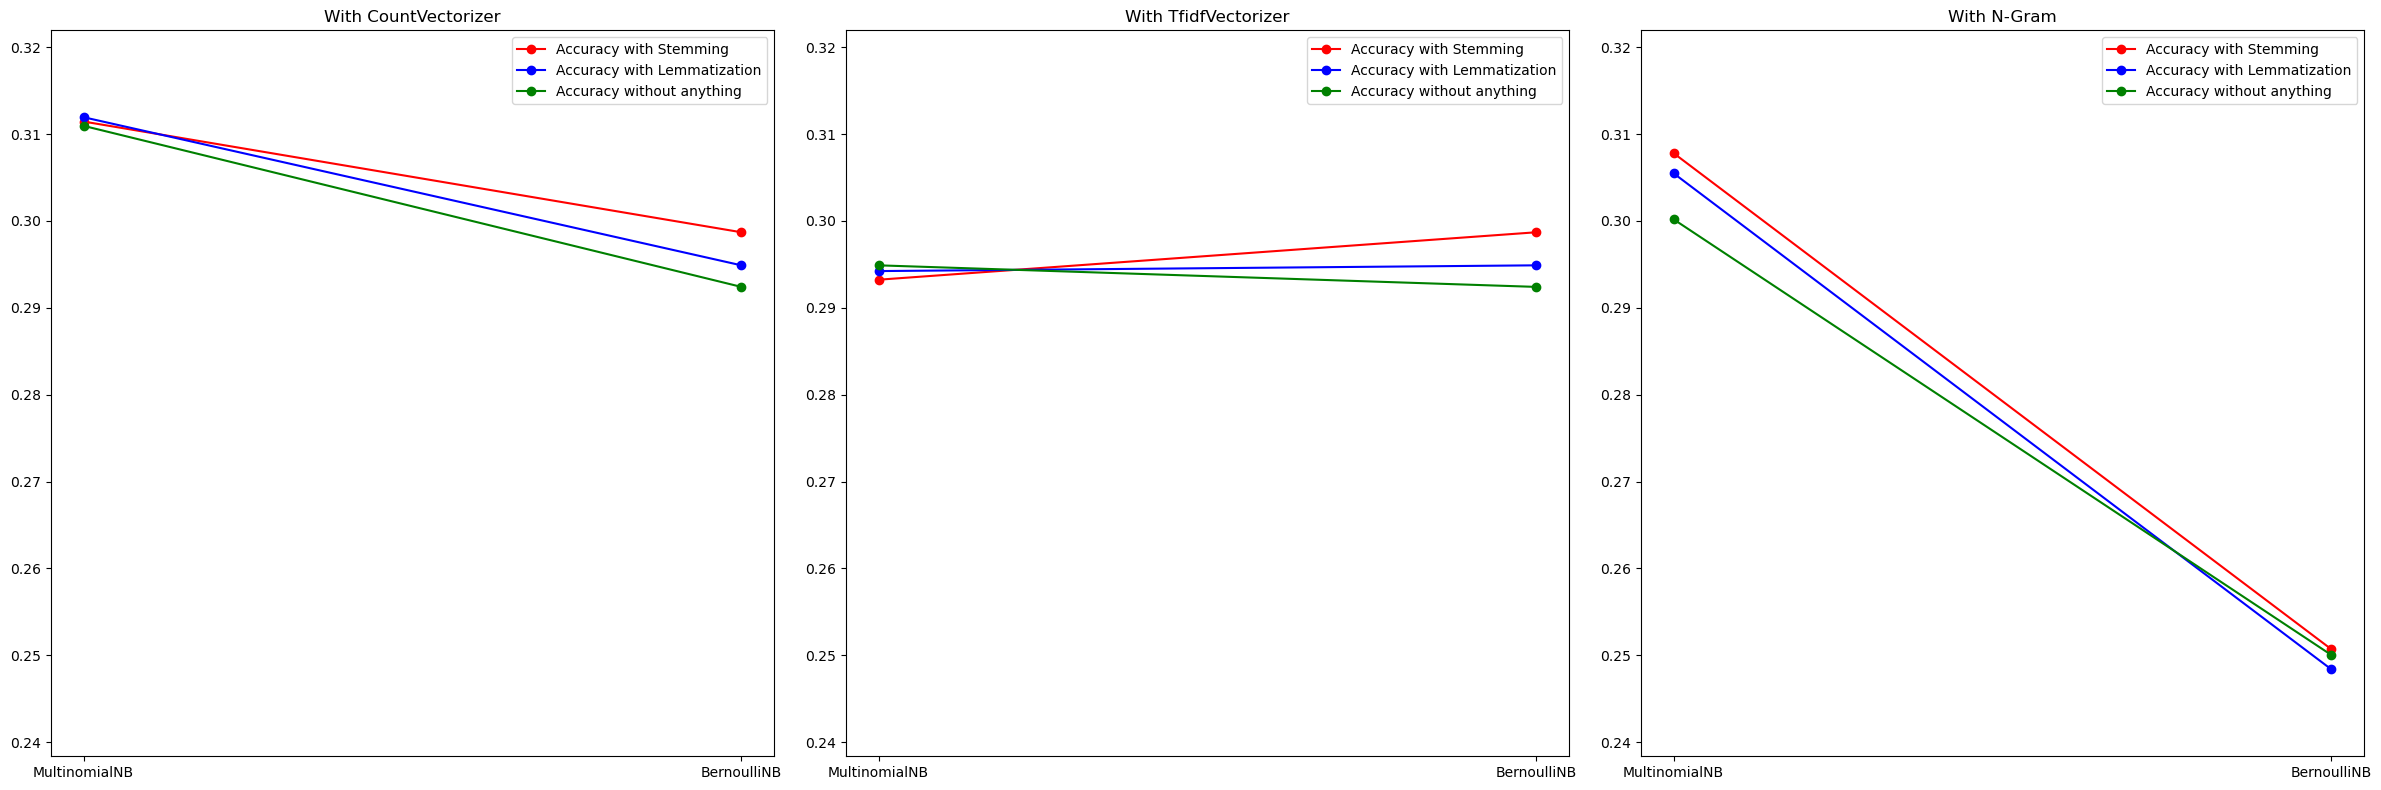

In [230]:
models = [MultinomialNB(), BernoulliNB(), RandomForestClassifier(), SVC(probability=True)]
names = ['MultinomialNB', 'BernoulliNB', 'RandomForestClassifier', 'SVC']

plots(models[:2], names[:2])